# Predicting Impact of Forest Fires

## Introduction

## Exploratory Data Analysis

First, we read in our relevant libraries

In [73]:
library(tidyverse)
library(ggplot2)
library(repr)
library(GGally)
library(broom)

In [74]:
#Read in the data 

forest_fire_data <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")
head(forest_fire_data)

tail(forest_fire_data)

forest_fire_dimensions <- dim(forest_fire_data)
forest_fire_dimensions

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
2,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
3,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
6,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
512,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0,0.00
513,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0,6.44
514,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0,54.29
515,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0,11.16
516,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0,0.00
517,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0,0.00


[1] 517  13

In [75]:
#TODO: Check for missing data
sum(is.na(forest_fire_data))


[1] 0

In [76]:
# Get rid of unimportant features in data: the day data
forest_fire_data <- select(forest_fire_data, -day)

# Make human friendly columns (MIGHT NOT BE NECESSARY)
forest_fire_clean_data <- forest_fire_data %>%
    rename(
    x_axis_coord = X,
    y_axis_coord = Y,
    relative_humidity = RH,
    area_burned = area)

head(forest_fire_clean_data)

,x_axis_coord,y_axis_coord,month,FFMC,DMC,DC,ISI,temp,relative_humidity,wind,rain,area_burned
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,7,5,mar,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
2,7,4,oct,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
3,7,4,oct,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
4,8,6,mar,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
5,8,6,mar,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
6,8,6,aug,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


  x_axis_coord    y_axis_coord    month                FFMC      
 Min.   :1.000   Min.   :2.0   Length:517         Min.   :18.70  
 1st Qu.:3.000   1st Qu.:4.0   Class :character   1st Qu.:90.20  
 Median :4.000   Median :4.0   Mode  :character   Median :91.60  
 Mean   :4.669   Mean   :4.3                      Mean   :90.64  
 3rd Qu.:7.000   3rd Qu.:5.0                      3rd Qu.:92.90  
 Max.   :9.000   Max.   :9.0                      Max.   :96.20  
      DMC              DC             ISI              temp      
 Min.   :  1.1   Min.   :  7.9   Min.   : 0.000   Min.   : 2.20  
 1st Qu.: 68.6   1st Qu.:437.7   1st Qu.: 6.500   1st Qu.:15.50  
 Median :108.3   Median :664.2   Median : 8.400   Median :19.30  
 Mean   :110.9   Mean   :547.9   Mean   : 9.022   Mean   :18.89  
 3rd Qu.:142.4   3rd Qu.:713.9   3rd Qu.:10.800   3rd Qu.:22.80  
 Max.   :291.3   Max.   :860.6   Max.   :56.100   Max.   :33.30  
 relative_humidity      wind            rain          area_burned     
 Min.

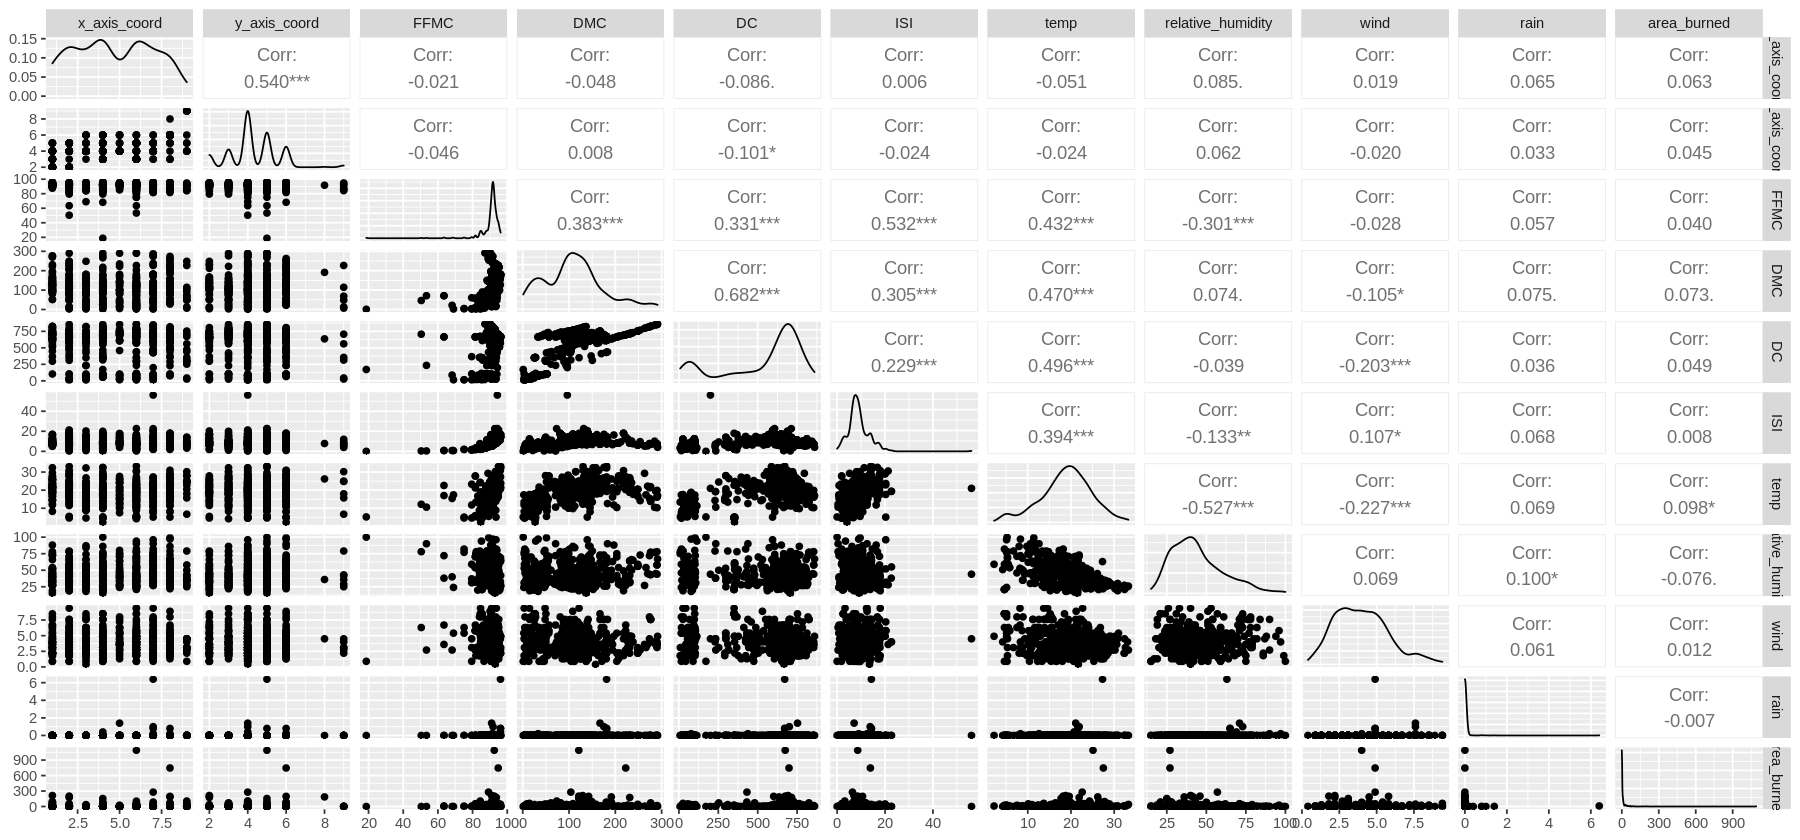

In [77]:
options(repr.plot.width = 15, repr.plot.height = 7) 
# # Boxplots for outliers (NOT NECESSARY FOR NOW) 
# fire_feature_boxplot <- forest_fire_clean_data %>%
#     ggplot()

# Table for mean, sd, min, max of all values (IN PROGRESS)
summary(forest_fire_clean_data)

# GG pairs
forest_fire_numeric_data <- forest_fire_clean_data %>%
    select(-month)
forest_fire_ggpairs <- ggpairs(forest_fire_numeric_data)
forest_fire_ggpairs

var1,var2,corr
<chr>,<chr>,<dbl>
x_axis_coord,x_axis_coord,1.000000000
x_axis_coord,y_axis_coord,0.539548171
x_axis_coord,FFMC,-0.021039272
x_axis_coord,DMC,-0.048384178
x_axis_coord,DC,-0.085916123
x_axis_coord,ISI,0.006209941


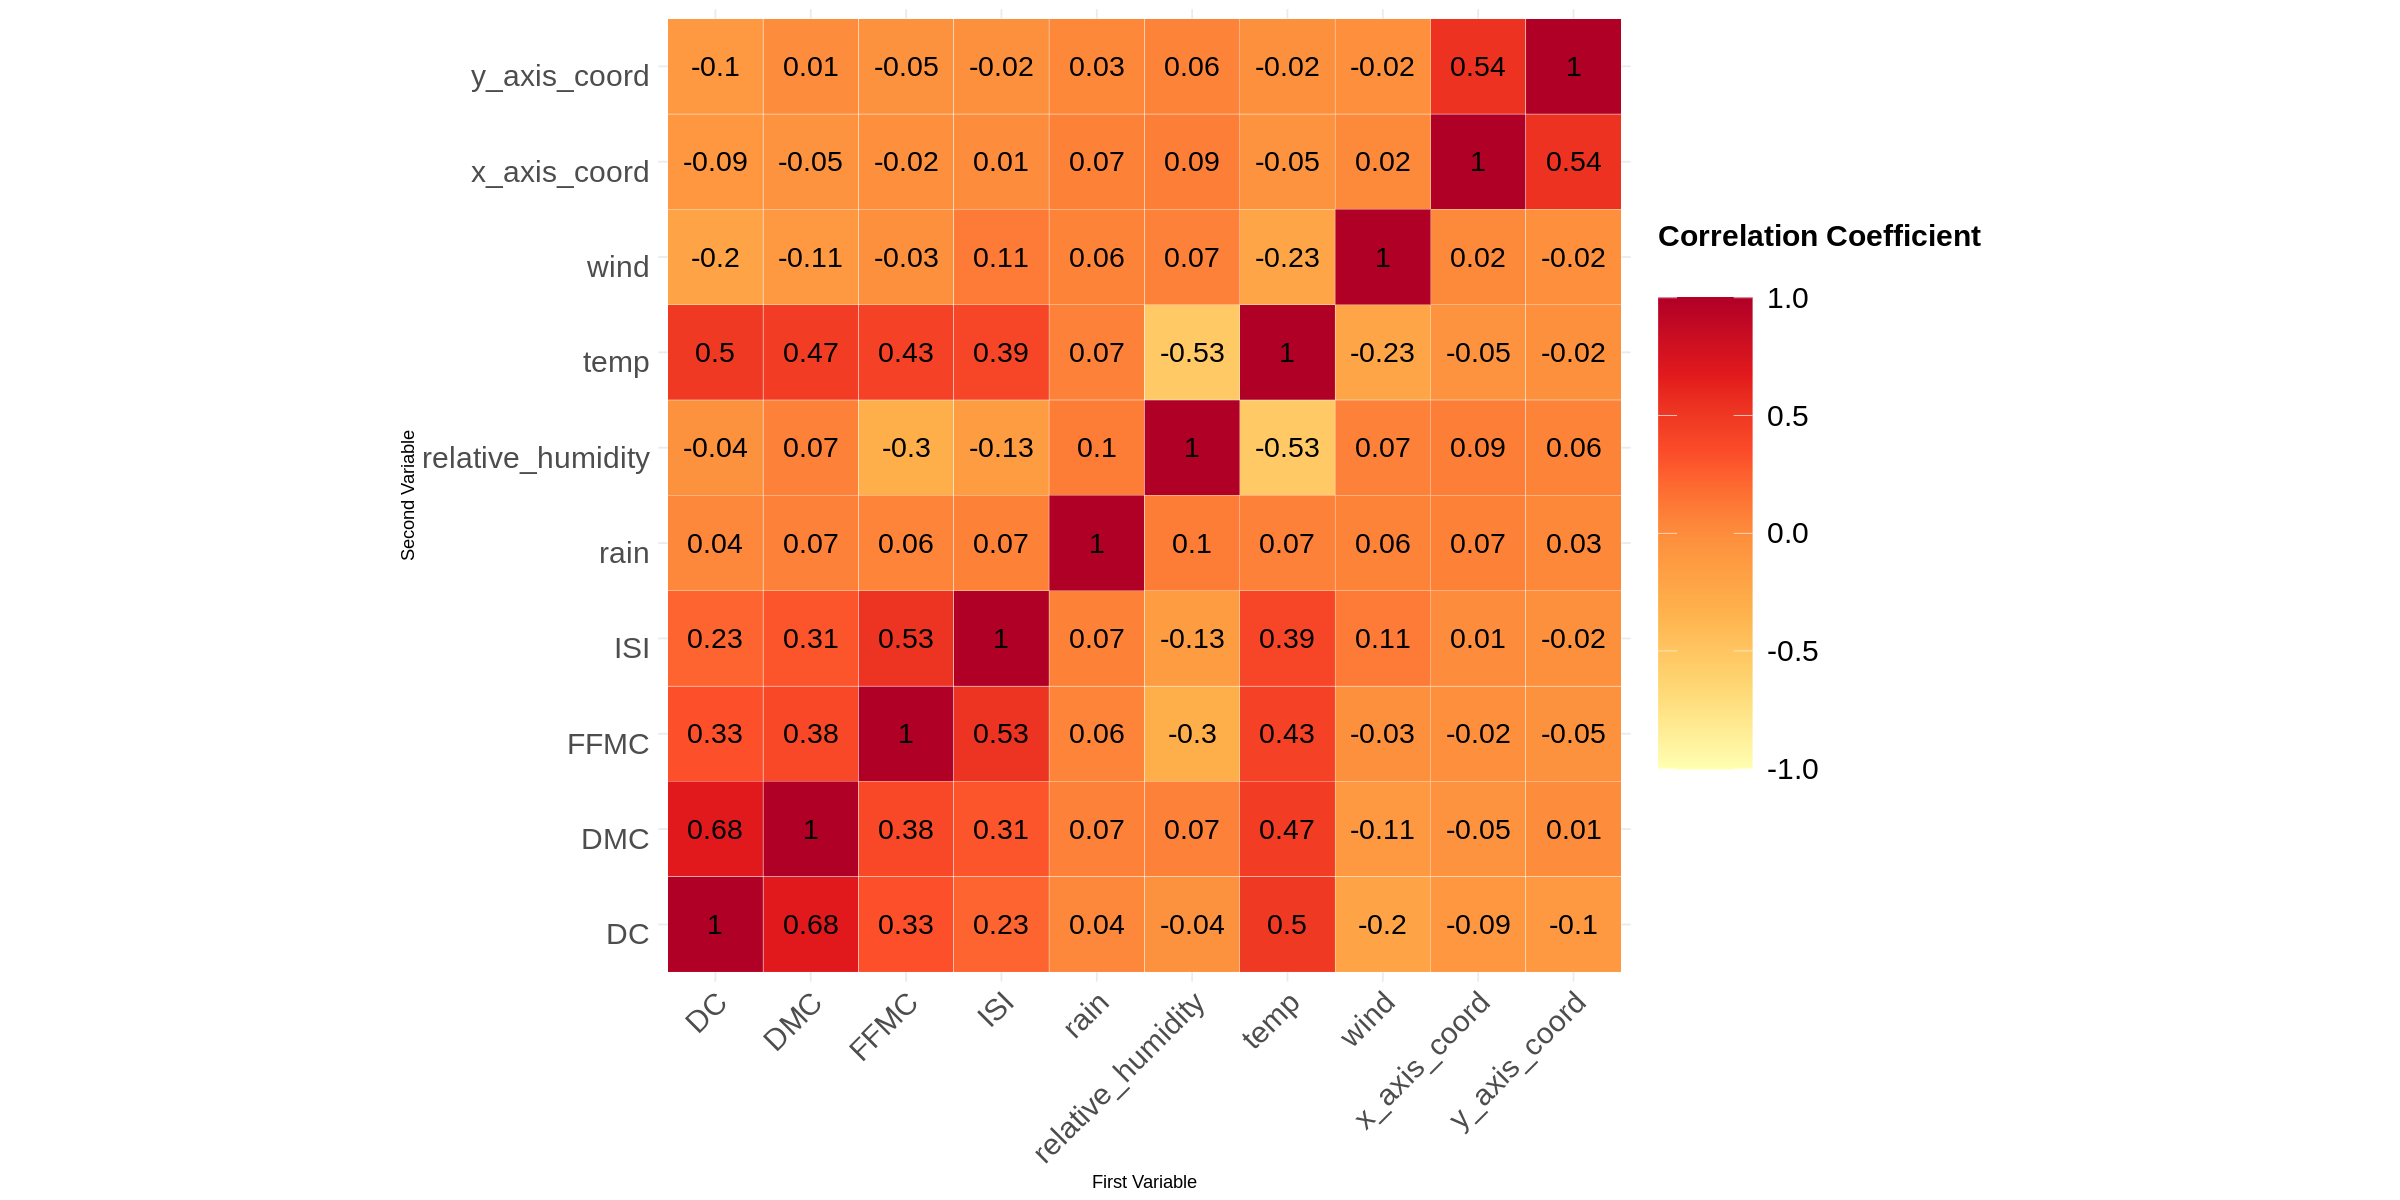

In [78]:
options(repr.plot.width = 20, repr.plot.height = 10) 

# Heat Map 

#First, find correlation matrix for all potential explanatory variables
corr_matrix_forest_fire <- forest_fire_numeric_data %>%
  select(- area_burned) %>% 
  cor() %>%
  as.data.frame() %>%
  rownames_to_column("var1") %>%
  pivot_longer(-var1, names_to = "var2", values_to = "corr")
head(corr_matrix_forest_fire)

#Create the Heat Map based on the correlation matrix found 
plot_corr_matrix_forest_fires <- corr_matrix_forest_fire %>%
  ggplot(aes(x = var1, y = var2)) +
  geom_tile(aes(fill = corr), color = "white") +
  scale_fill_distiller("Correlation Coefficient \n",
    palette =  "YlOrRd", direction = 1, limits = c(-1, 1)) +
  labs(x = "First Variable", y = "Second Variable") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(
      angle = 45, vjust = 1,
      size = 18, hjust = 1
    ),
    axis.text.y = element_text(
      vjust = 1,
      size = 18, hjust = 1
    ),
    legend.title = element_text(size = 18, face = "bold"),
    legend.text = element_text(size = 18),
    legend.key.size = unit(2, "cm")
  ) +
  coord_fixed() +
  geom_text(aes(x = var1, y = var2, label = round(corr, 2)), color = "black", size = 6)
plot_corr_matrix_forest_fires

Most correlated variables: DMC & DC (0.68), ISI & FFMC (0.53),  y_axis_coord & x_axis_coord (0.54), temp % relative humidity (-0.53) 

In [79]:
set.seed(123)

#Split into training and testing data 80/20 for now (as it is a good generic split)
dt = sort(sample(nrow(forest_fire_data), nrow(forest_fire_data)*.8))
forest_train_data<-forest_fire_data[dt,]

forest_test_data<-forest_fire_data[-dt,]

In [80]:
#Standardize values using train, then apply that to test 
forest_train_scaled <-  forest_train_data %>%
    select(-month) %>%
    mutate_all(~(scale(.) %>% as.vector)) %>%
    cbind(select(forest_train_data, month))
head(forest_train_scaled)
# forest_test_scaled = scale(select(forest_test_data, -month), center=attr(forest_train_scaled, "scaled:center"), 
#                               scale=attr(forest_train_scaled, "scaled:scale"))

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2,1.002488,-0.2223085,-0.02127961,-1.2198661,0.4587377,-0.51754617,-0.1853360,-0.6562091,-1.721210528,-0.1008312,-0.2000889,oct
3,1.002488,-0.2223085,-0.02127961,-1.0909681,0.5313930,-0.51754617,-0.7710863,-0.6562091,-1.498143156,-0.1008312,-0.2000889,oct
4,1.428880,1.4027076,0.17682133,-1.2524788,-1.9560327,-0.02191445,-1.8564470,3.2059417,0.007561606,1.9813325,-0.2000889,mar
5,1.428880,1.4027076,-0.25539890,-0.9729411,-1.8552131,0.10738079,-1.3223806,3.3266339,-1.219308941,-0.1008312,-0.2000889,mar
6,1.428880,1.4027076,0.28487639,-0.4449253,-0.2804694,1.20639027,0.5382378,-0.8975935,0.788297408,-0.1008312,-0.2000889,aug
7,1.428880,1.4027076,0.28487639,-0.3890177,-0.2494480,-0.12966047,0.8655689,-1.0182857,-0.494339981,-0.1008312,-0.2000889,aug


In [81]:
typeof(select(forest_train_data, month))


[1] "list"

## Methods: Plan

In this analysis, we are drawing from a data set that is trustworthy. For one, there are no missing values. This means we don’t have to omit any observations, or fill in blanks ourselves, which makes our report more reliable. Additionally, the nature of the data is objective. By taking measurements of location, weather aspects, and area burnt, there is very little human subjectivity involved. Finally, by setting the seed to maintain consistent results and explaining our decision-making along the way, we will produce a reproducible and trustworthy report from the data.

**Methods we plan to use:**

- Use training data to apply forward substitution and Bayesian Information Criterion (BIC) values to choose predictor variables
- Use training data to utilize Asymptotic and Bootstrap methods to create linear regression models which will predict "area burned", our response variable 
- Compare the Asymptotic and Bootstrap methods
- Check for issues such as Heteroscedasticity, Normality, and Multicollinearity in our model, and adjust our model accordingly to rectify them
- With our test data, evaluate the statistical model using the Test Mean Squared Error
- Make a prediction using local forest data from British Columbia, while keeping in mind issues around generalizability


**We expect to achieve:**

Given the necessary information about a location, we expect to be able to predict with reasonable accuracy the area burned if a forest fire were to occur in that location. We also expect to go through a systematic, reproducible, process to determine which predictor variables create a good statistical model.

**Potential impact:**

Our report could be useful in many ways. For one, our results could help with resource designation, as there are only a finite amount of resources for fire-fighting. Therefore, if we know, for example, that low humidity is a big indicator of forest fire area, we can allocate more fire-fighting resources to areas with low-humidity than to high-humidity areas. In addition, our results could help with fire-preparation. If the data indicates that a fire is predicted to cover a very large area, it could be life saving to alert citizens of the danger to evacuate with ample warning.

## References